-----
##**Bank marketing**
-----
**Goal**: Predict whether a client will subscribe to a term deposit (yes/no)

**Dataset**: UCI Bank Marketing (41K records, 20 features)

---
## **Data Description**

   1 - age (numeric)

   2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")

   3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)

   4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")

   5 - default: has credit in default? (categorical: "no","yes","unknown")

   6 - housing: has housing loan? (categorical: "no","yes","unknown")

   7 - loan: has personal loan? (categorical: "no","yes","unknown")

   8 - contact: contact communication type (categorical: "cellular","telephone")

   9 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

  10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")

  11 - duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

  12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

  13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

  14 - previous: number of contacts performed before this campaign and for this client (numeric)

  15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")

  16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

  17 - cons.price.idx: consumer price index - monthly indicator (numeric)     

  18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)     

  19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

  20 - nr.employed: number of employees - quarterly indicator (numeric)

  Output variable (desired target):

  21 - y - has the client subscribed a term deposit? (binary: "yes","no")

In [ ]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

In [ ]:
df = pd.read_csv("/content/bank-additional-full.csv", sep=";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df = df.rename(columns={
    "emp.var.rate": "emp_var_rate",
    "cons.price.idx": "cons_price_idx",
    "cons.conf.idx": "cons_conf_idx",
    "nr.employed": "nr_employed"
})

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
print(df.info())

print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

### **Transforming Target Y**

In [ ]:
df["y"] = df["y"].map({"yes": 1, "no": 0})
df["y"].value_counts(normalize=True)

,proportion
y,
0,0.887346
1,0.112654


In [ ]:
print("Info \n",df.info(), "\nHead \n"
,df.head(),"\n Sum of Null Values \n"
,df.isna().sum(),"\nSum of Unknown \n",
df.apply(lambda x: (x == "unknown").sum())
)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

#### Replaced "unknown" to "Unknown

In [ ]:
cols_with_unknown = ["job", "marital", "education", "default", "housing", "loan"]
for col in cols_with_unknown:
    df[col] = df[col].replace("unknown", "Unknown")

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,Unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [ ]:
for col in ["job", "marital", "education", "housing", "loan", "default"]:
    print(f"{col}:\n", df[col].value_counts(normalize=True).round(3), "\n")

job:
 job
admin.           0.253
blue-collar      0.225
technician       0.164
services         0.096
management       0.071
retired          0.042
entrepreneur     0.035
self-employed    0.035
housemaid        0.026
unemployed       0.025
student          0.021
Unknown          0.008
Name: proportion, dtype: float64 

marital:
 marital
married     0.605
single      0.281
divorced    0.112
Unknown     0.002
Name: proportion, dtype: float64 

education:
 education
university.degree      0.295
high.school            0.231
basic.9y               0.147
professional.course    0.127
basic.4y               0.101
basic.6y               0.056
Unknown                0.042
illiterate             0.000
Name: proportion, dtype: float64 

housing:
 housing
yes        0.524
no         0.452
Unknown    0.024
Name: proportion, dtype: float64 

loan:
 loan
no         0.824
yes        0.152
Unknown    0.024
Name: proportion, dtype: float64 

default:
 default
no         0.791
Unknown    0.209
yes        

In [ ]:
df["pdays"] = df["pdays"].replace(999, -1)

df["pdays"].value_counts()

,count
pdays,
-1,39673
3,439
6,412
4,118
9,64
2,61
7,60
12,58
10,52


In [ ]:
df["job"].value_counts(normalize=True).round(5)

,proportion
job,
admin.,0.25303
blue-collar,0.22468
technician,0.16371
services,0.09636
management,0.07099
retired,0.04176
entrepreneur,0.03535
self-employed,0.03450
housemaid,0.02574


In [ ]:
threshold = 0.01 * len(df)  # 1% of total rows
rare_jobs = df["job"].value_counts()[df["job"].value_counts() < threshold]
print(rare_jobs)

job
Unknown    330
Name: count, dtype: int64


### **Full Preprocessing Pipeline Design**


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

numeric_features = ["age", "campaign", "pdays", "previous",
                    "emp_var_rate", "cons_price_idx", "cons_conf_idx",
                    "euribor3m", "nr_employed"]

numeric_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median"))
])



nominal_features = ["job", "marital", "housing", "loan",
                    "contact", "month", "day_of_week",
                    "poutcome", "default"]

nominal_pipeline = Pipeline([
    # ("rare_grouper", RareCategoryGrouper(threshold=0.01)), # RareCategoryGrouper is not a standard scikit-learn class
    ("imputer", SimpleImputer(strategy="constant", fill_value="Unknown")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])



ordinal_features = ["education"]
education_order = [["illiterate", "basic.4y", "basic.6y", "basic.9y",
                    "high.school", "professional.course",
                    "university.degree", "Unknown"]]

ordinal_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="constant", fill_value="Unknown")),
    ("ordinal", OrdinalEncoder(categories=education_order))
])



preprocessor = ColumnTransformer([
    ("num", numeric_pipeline, numeric_features),
    ("cat_nom", nominal_pipeline, nominal_features),
    ("cat_ord", ordinal_pipeline, ordinal_features)
])

###**Train-test-split**

In [ ]:
X = df.drop(columns=["y", "duration"])
y = df["y"]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)

### **LightBGM ML Model with parameters**

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline

params = {
    "learning_rate": 0.05,
    "n_estimators": 1000,
    "num_leaves": 31,
    "max_depth": 8,
    "min_child_samples":50,
    "reg_alpha":0.3,
    "reg_lambda":0.5,
    "subsample":0.8,
    "colsample_bytree": 0.8,
    "class_weight":'balanced',
    "random_state": 42
}

model_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", LGBMClassifier(**params))
])


In [ ]:
model_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['age', 'campaign', 'pdays',
                                                   'previous', 'emp_var_rate',
                                                   'cons_price_idx',
                                                   'cons_conf_idx', 'euribor3m',
                                                   'nr_employed']),
                                                 ('cat_nom',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('onehot...
                                                                   OrdinalEncoder(categories=[['illiterate',
                                                                                               'basic.4y',
                                                                                               'basic.6y',
                                                                                               'basic.9y',
                                                                                               'high.school',
                                                                                               'professional.course',
                                                                                               'university.degree',
                                                                                               'Unknown']]))]),
                                                  ['education'])])),
                ('model',
                 LGBMClassifier(class_weight='balanced', colsample_bytree=0.8,
                                learning_rate=0.05, max_depth=8,
                                min_child_samples=50, n_estimators=1000,
                                random_state=42, reg_alpha=0.3, reg_lambda=0.5,
                                subsample=0.8))])

###**Training Model (with early stopping)**

In [ ]:
model = model_pipeline.named_steps["model"]

model_pipeline.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 3248, number of negative: 25583
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004222 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 512
[LightGBM] [Info] Number of data points in the train set: 28831, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['age', 'campaign', 'pdays',
                                                   'previous', 'emp_var_rate',
                                                   'cons_price_idx',
                                                   'cons_conf_idx', 'euribor3m',
                                                   'nr_employed']),
                                                 ('cat_nom',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('onehot...
                                                                   OrdinalEncoder(categories=[['illiterate',
                                                                                               'basic.4y',
                                                                                               'basic.6y',
                                                                                               'basic.9y',
                                                                                               'high.school',
                                                                                               'professional.course',
                                                                                               'university.degree',
                                                                                               'Unknown']]))]),
                                                  ['education'])])),
                ('model',
                 LGBMClassifier(class_weight='balanced', colsample_bytree=0.8,
                                learning_rate=0.05, max_depth=8,
                                min_child_samples=50, n_estimators=1000,
                                random_state=42, reg_alpha=0.3, reg_lambda=0.5,
                                subsample=0.8))])

###**Evaluating the model**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

y_pred = model_pipeline.predict(X_val)
y_pred_proba = model_pipeline.predict_proba(X_val)[:, 1]

print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred))
print("Recall:", recall_score(y_val, y_pred))
print("F1:", f1_score(y_val, y_pred))
print("AUC:", roc_auc_score(y_val, y_pred_proba))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Accuracy: 0.8478471997410165
Precision: 0.3892921960072595
Recall: 0.6163793103448276
F1: 0.4771968854282536
AUC: 0.7934229369262833


###**Finding important features**

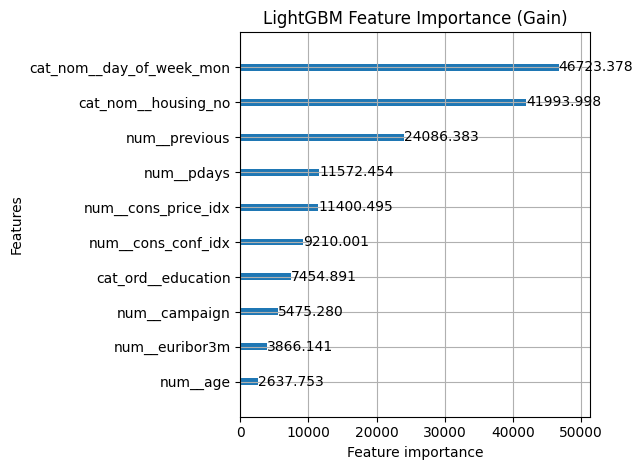

In [ ]:
import matplotlib.pyplot as plt
import lightgbm as lgb
import pandas as pd

fitted_preprocessor = model_pipeline.named_steps['preprocessor']

processed_feature_names = fitted_preprocessor.get_feature_names_out(X_train.columns)

ax = lgb.plot_importance(model, max_num_features=10, importance_type='gain') # Using 'gain' importance type is often more informative
ax.set_yticklabels(processed_feature_names[np.argsort(model.feature_importances_*-1)][:10]) # Manually set yticklabels based on importance order
plt.title("LightGBM Feature Importance (Gain)") # Add a title
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

###**Hyper-parameter Tuning**

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.pipeline import Pipeline

# Define base model
lgb_model = LGBMClassifier(
    class_weight='balanced',
    n_estimators=2000,
    learning_rate=0.03,
    random_state=42
)

# Define parameter search space
param_distributions = {
    'model__num_leaves': randint(15, 127),
    'model__max_depth': randint(4, 12),
    'model__min_child_samples': randint(20, 120),
    'model__subsample': uniform(0.6, 0.4),
    'model__colsample_bytree': uniform(0.6, 0.4),
    'model__reg_alpha': uniform(0.0, 1.0),
    'model__reg_lambda': uniform(0.0, 1.0)
}

# Create a pipeline with the preprocessor and the model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', lgb_model)
])


search = RandomizedSearchCV(
    estimator=pipeline, # Use the pipeline as the estimator
    param_distributions=param_distributions,
    n_iter=50,                     # try 50 random combinations
    scoring='roc_auc',             # use AUC (handles imbalance well)
    cv=3,                          # 3-fold CV for speed
    verbose=2,
    n_jobs=-1,
    random_state=42
)

search.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[LightGBM] [Info] Number of positive: 3248, number of negative: 25583
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004160 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 28831, number of used features: 53
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightG

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median'))]),
                                                                               ['age',
                                                                                'campaign',
                                                                                'pdays',
                                                                                'previous',
                                                                                'emp_var_rate',
                                                                                'cons_price_idx',
                                                                                'cons_conf_idx',
                                                                                'euribor3m',
                                                                                'nr_employed']),
                                                                              ('cat_nom',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(fill_value='Unkno...
                                        'model__num_leaves': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x793fb61de660>,
                                        'model__reg_alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x793fb5da9460>,
                                        'model__reg_lambda': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x793fb5dd09b0>,
                                        'model__subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x793fb5da9280>},
                   random_state=42, scoring='roc_auc', verbose=2)

In [ ]:
print("Best Parameters:", search.best_params_)
print("Best AUC:", search.best_score_)

best_model = search.best_estimator_

Best Parameters: {'model__colsample_bytree': np.float64(0.7454518409517176), 'model__max_depth': 4, 'model__min_child_samples': 77, 'model__num_leaves': 66, 'model__reg_alpha': np.float64(0.2468760628386012), 'model__reg_lambda': np.float64(0.6963042728397884), 'model__subsample': np.float64(0.8849082359697769)}
Best AUC: 0.785764370628388


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

y_val_proba = best_model.predict_proba(X_val)[:, 1]

import numpy as np

thresholds = np.arange(0.1, 0.91, 0.05)

for t in thresholds:
    y_pred = (y_val_proba >= t).astype(int)
    prec = precision_score(y_val, y_pred)
    rec = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    print(f"Threshold={t:.2f} | Precision={prec:.3f} | Recall={rec:.3f} | F1={f1:.3f}")


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Threshold=0.10 | Precision=0.118 | Recall=0.980 | F1=0.210
Threshold=0.15 | Precision=0.128 | Recall=0.945 | F1=0.225
Threshold=0.20 | Precision=0.145 | Recall=0.908 | F1=0.250
Threshold=0.25 | Precision=0.167 | Recall=0.868 | F1=0.281
Threshold=0.30 | Precision=0.194 | Recall=0.815 | F1=0.313
Threshold=0.35 | Precision=0.231 | Recall=0.767 | F1=0.355
Threshold=0.40 | Precision=0.274 | Recall=0.718 | F1=0.397
Threshold=0.45 | Precision=0.323 | Recall=0.675 | F1=0.437
Threshold=0.50 | Precision=0.371 | Recall=0.636 | F1=0.469
Threshold=0.55 | Precision=0.420 | Recall=0.615 | F1=0.499
Threshold=0.60 | Precision=0.456 | Recall=0.592 | F1=0.515
Threshold=0.65 | Precision=0.481 | Recall=0.573 | F1=0.523
Threshold=0.70 | Precision=0.509 | Recall=0.540 | F1=0.524
Threshold=0.75 | Precision=0.535 | Recall=0.489 | F1=0.511
Threshold=0.80 | Precision=0.560 | Recall=0.398 | F1=0.465
Threshold=0.85 | Precision=0.618 | Recall=0.323 | F1=0.425
Threshold=0.90 | Precision=0.681 | Recall=0.221 | F1=0.3

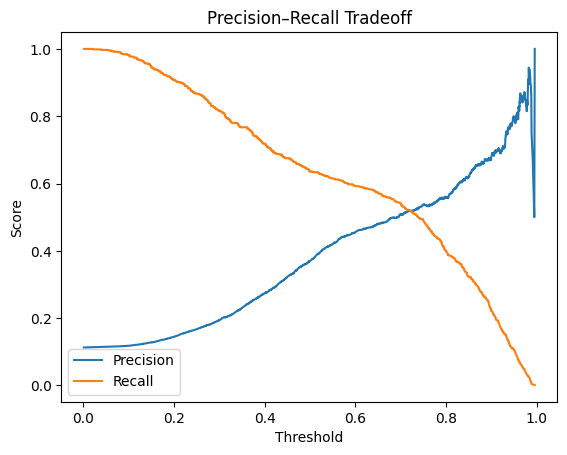

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresh = precision_recall_curve(y_val, y_val_proba)

plt.plot(thresh, precisions[:-1], label="Precision")
plt.plot(thresh, recalls[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()
plt.title("Precision–Recall Tradeoff")
plt.show()

###**Final Hyperparamter tuning with additional parameters**

---------

| Parameter           | Value | Role                                   |
| ------------------- | ----- | -------------------------------------- |
| `num_leaves`        | 66    | tree complexity (moderate)             |
| `max_depth`         | 4     | shallow trees → regularized            |
| `min_child_samples` | 77    | prevents tiny leaves (smooth)          |
| `subsample`         | 0.885 | good randomness                        |
| `colsample_bytree`  | 0.745 | feature subsampling (prevents overfit) |
| `reg_alpha`         | 0.247 | L1 regularization                      |
| `reg_lambda`        | 0.696 | L2 regularization                      |

---------

In [ ]:
final_model = LGBMClassifier(
    class_weight='balanced',
    n_estimators=2000,
    learning_rate=0.03,
    num_leaves=66,
    max_depth=4,
    min_child_samples=77,
    subsample=0.8849,
    colsample_bytree=0.745,
    reg_alpha=0.247,
    reg_lambda=0.696,
    random_state=42
)

# Combine train and val for final training
X_final = pd.concat([X_train, X_val], ignore_index=True)
y_final = pd.concat([y_train, y_val], ignore_index=True)

# Apply the preprocessor to the combined data
X_final_processed = preprocessor.transform(X_final)

final_model.fit(X_final_processed, y_final)

[LightGBM] [Info] Number of positive: 3944, number of negative: 31065
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004770 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 515
[LightGBM] [Info] Number of data points in the train set: 35009, number of used features: 53
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

LGBMClassifier(class_weight='balanced', colsample_bytree=0.745,
               learning_rate=0.03, max_depth=4, min_child_samples=77,
               n_estimators=2000, num_leaves=66, random_state=42,
               reg_alpha=0.247, reg_lambda=0.696, subsample=0.8849)

In [ ]:
best_model = search.best_estimator_

# Apply the preprocessor to the test data
X_test_processed = preprocessor.transform(X_test)

# Make predictions on the test set
y_test_pred_proba = final_model.predict_proba(X_test_processed)[:, 1]

for t in [0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.7,]:

    optimal_threshold = t
    y_test_pred = (y_test_pred_proba >= optimal_threshold).astype(int)

    print("Test Set Evaluation (Threshold =", t, "):")
    print("Accuracy:", accuracy_score(y_test, y_test_pred))
    print("Precision:", precision_score(y_test, y_test_pred))
    print("Recall:", recall_score(y_test, y_test_pred))
    print("F1:", f1_score(y_test, y_test_pred))
    print("AUC:", roc_auc_score(y_test, y_test_pred_proba))
    print("\n")


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Test Set Evaluation (Threshold = 0.3 ):
Accuracy: 0.5827803851755947
Precision: 0.18820410868124585
Recall: 0.8160919540229885
F1: 0.30586968228325256
AUC: 0.8015438523670866


Test Set Evaluation (Threshold = 0.35 ):
Accuracy: 0.6761611911312511
Precision: 0.22386796445196783
Recall: 0.7600574712643678
F1: 0.3458646616541353
AUC: 0.8015438523670866


Test Set Evaluation (Threshold = 0.4 ):
Accuracy: 0.7570804337271403
Precision: 0.27676095396561284
Recall: 0.7169540229885057
F1: 0.399359743897559
AUC: 0.8015438523670866


Test Set Evaluation (Threshold = 0.45 ):
Accuracy: 0.8088687489885095
Precision: 0.33171408743927827
Recall: 0.6867816091954023
F1: 0.4473561066916238
AUC: 0.8015438523670866


Test Set Evaluation (Threshold = 0.5 ):
Accuracy: 0.842854830878783
Precision: 0.3853211009174312
Recall: 0.6637931034482759
F1: 0.48759894459102904
AUC: 0.8015438523670866


Test Set Evaluation (Threshold = 0.55 ):
Accuracy: 0.8625991260721799
Precision: 0.4260869565217391
Recall: 0.633620689

###**Loading Final model into joblib file**

In [ ]:
import joblib

from sklearn.pipeline import Pipeline
final_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', final_model)
])

joblib.dump(final_pipeline, "lgb_bank_marketing_model.joblib")

['lgb_bank_marketing_model.joblib']

/usr/local/lib/python3.12/dist-packages/shap/explainers/_tree.py:586: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


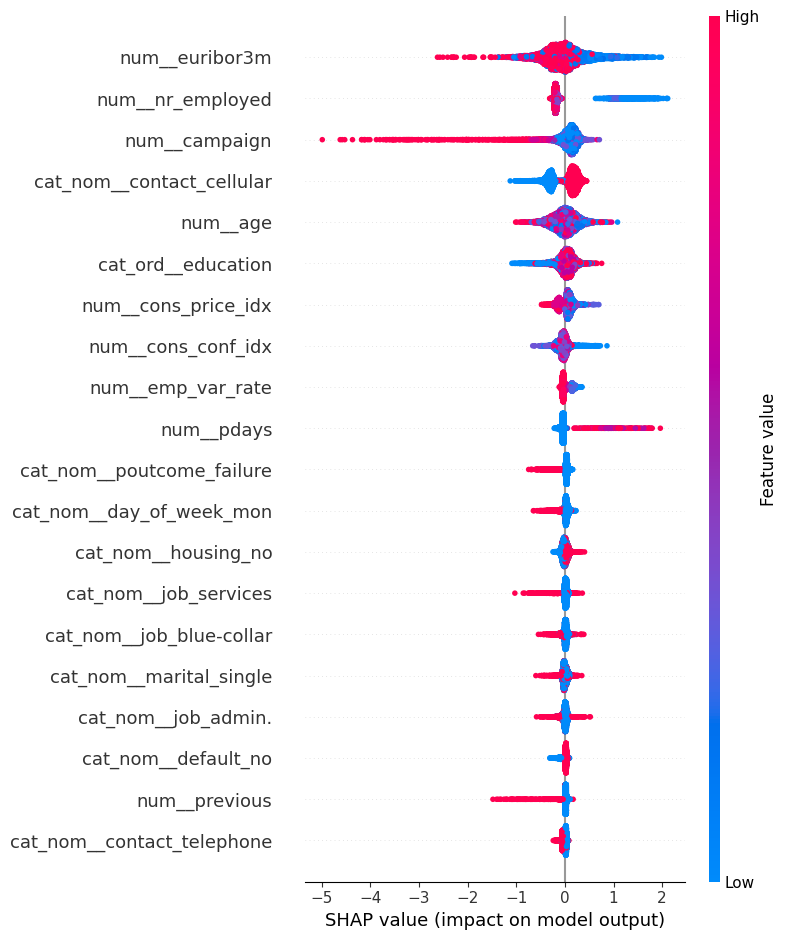

In [ ]:
import shap

# Get the LightGBM model from pipeline
model = model_pipeline.named_steps['model']

# Get transformed validation data
X_val_prep = model_pipeline.named_steps['preprocessor'].transform(X_val)

# Feature names
feature_names = model_pipeline.named_steps['preprocessor'].get_feature_names_out()
X_val_prep_df = pd.DataFrame(X_val_prep, columns=feature_names)

# Build SHAP explainer
explainer = shap.TreeExplainer(model)

# Get SHAP values for positive class (1)
shap_values = explainer.shap_values(X_val_prep_df)

# ✅ If LightGBM returns a list → take the [1]
if isinstance(shap_values, list):
    shap_values = shap_values[1]

# Summary plot (global explainability)
shap.summary_plot(shap_values, X_val_prep_df)

###**Business goals based on Threshold**

-----
| Goal                                       | Recommended Threshold | Reason                            |
| ------------------------------------------ | --------------------- | --------------------------------- |
|**Maximize Recall (find all subscribers)** | 0.40–0.45             | catches ~70% yes clients          |
| **Balanced F1 (marketing balance)**        | 0.50–0.60             | F1 ≈ 0.49–0.52 → best overall mix |
| **Maximize Precision (only best leads)**   | 0.70                  | fewer false positives             |


---------


-----
###**Final Model Summary — Bank Marketing Campaign Prediction**
-----
Goal: Predict whether a client will subscribe to a term deposit (yes/no)

Dataset: **UCI Bank Marketing** (41K records, 20 features)

Tech Stack: **Python, Pandas, Scikit-learn, LightGBM, Optuna, Matplotlib, FastAPI**

Performed full **EDA**, handled missing/unknown categories, encoded mixed features via **ColumnTransformer**

Built **ML pipeline** (**scaling + encoding + model**)

Used **LightGBM** with class weighting to **handle imbalance**

**Tuned hyperparameters** using **RandomizedSearchCV** & threshold optimization for F1/Recall balance

-------
####**Best Threshold: 0.6**

| **Metric**    | **Score** |
| --------- | --------- |
| **Accuracy**  | **0.873** |
| **Precision** | **0.453** |
| **Recall**    | **0.612** |
| **F1**        | **0.520** |
| **AUC**       | **0.801** |

-------
#####**For bank marketing / subscription prediction**
The business usually prefers to catch **more potential subscribers (recall)** they can filter later by cost.

But since **F1 (0.520)** is best at **0.6** ,
and accuracy stays high (0.87),
the best final operational **threshold = 0.6**

Deployed via **FastAPI** with real-time scoring endpoint and **SHAP**-based feature interpretability

Outcome:
**Model detects >50%** of likely subscribers with **0.80 AUC**, supporting **smarter customer targeting** and **campaign optimization**.